<a href="https://colab.research.google.com/github/gtzambranop/UN_2020_2/blob/DCD/DCD/module_2/basic_python_class_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Pyhton Básico"**

* **Profesor:** Francisco Javier Ospina Salazar
* **Monitoras:**
  - Diana Carolina Sanchez Perez
  - Guiselle Tatiana Zambrano Penagos
* **Fechas:** 
  - Inicio: 2020-09-12
  - Final: 2020-09-29
* [Presentación del curso](http://34.221.75.109/#/)


# Justificación del contenido de la clase

Dadas $X$ y $Y$ variables aleatorias, se tiene que el valor condicional de $Y$ dado $X=x$ se define como

$E(Y|X=x)$

Para entenderlo un poco más fácil vamos a un ejemplo particular si $X$
es un vector n-dimensional y $Y$ es una variable nominal, se estaría hablando de un análisis de regresión logístico en caso de $Y$ tomar dos valores o un análisis de regresión multinomial en caso de $Y$ tomar múltiples valore

Dado el caso anterior si tenemos $X$ como un vector de pixeles de una imagen y $y$ como la categoría a la que pertenece dicha imagen tenemos una regresión multinomial (modelo supervisado) que recibe como entrada una imagen e intenta clasficicarla.


#Contenido de la clase

- ¿Cómo ve una imagen un PC?
- ¿Qué es una red neutonal?
  - ¿Qué es una neurona artificial?
  - ¿Qué es una función de activación?
- ¿Que es una red neuronal convolucional?
  - Convolución
  - Kernel
  - Función de activación
  - Pooling
-¿Qué se ven las capas intermedias red una red neuronal?
- Ejemplo práctico
  - Lenet5
  - Mnist fashion
  - Implementación de una red neuronal convolucional



# ¿Cómo ve una imagen un PC?
![imagen](http://34.221.75.109/imagen_pc.png)

![imagen](http://34.221.75.109/Pixel_rgb.jpg)

# ¿Por que se usan redes neuronales para imágenes?

Vamos a poner un ejemplo puntual:

- Una imagen en una resolución de [480p](https://en.wikipedia.org/wiki/480p) tiene 640 x 480 pixeles, debido a que son tres capas de colores, al final se tiene que la cantidad de valores numericos de dicha imagen es de: 640 x 480 x 3 = 921600.

- Si se tienen 10000 imagenes para procesar al final las dimensiones de la matriz X serían 100000 x 921600.

- La estimación de los betas se obtiene mediante $\beta = (X^TX)^{-1}X^TY$

# ¿Qué es una red neuronal?

Conjunto de modelos simples interconectados entre sí.

![red neuronal](http://34.221.75.109/red_neuronal.png)

## ¿Cómo es una neurona artificial?

![neurona artificial](http://34.221.75.109/Neurona.png)

## ¿Qué es una función de activación?

![función activación](http://34.221.75.109/func_act.jpg)

## Entendiendo una red neuronal convolucional

Una red neuronal convolucional es una familia de redes neuronales diseñanas para procesar imágenes. Para esto se hace uso de dos pasos de forma recurrente:

- Convolución
  - Kernel
  - Función de activación
- Pooling



## ¿Qué es una convolución?

Dada la siguiente matriz:

![matriz](http://34.221.75.109/matriz.png)

Y el siguiente kernel:

![kernel](http://34.221.75.109/kernel.png)

La convolución se define como un barrido del kernel sobre la imagen inicial, haciendo productos uno a uno, posteriormente se hace la sumatoria de la matriz resultante de dichos productos. El resultado de todo el proceso es otra matriz.

![Convolución](http://34.221.75.109/convolucion.gif)

## Padding

El proceso de convolución hace que la matriz de salida sea más pequeña que la matriz de entrada. El p padding hace referencia a poner filas de ceros al exterior de la matriz para no reducir su dimensionalidad.


## Colvolución aplicada sobre una imagen

![convoluciones](http://34.221.75.109/convoluciones.png)

## Kernels o matrices convolutivas (cotidianas)

Gimp es uns software libre para edición fotográfica es en terminos coloquiales un photoshop con menos funcionalidades que es totalmente gratuito y abierto.

- [Gimp](https://www.gimp.org/)
- [Kernels convolutivos Gimp](https://docs.gimp.org/2.6/en/plug-in-convmatrix.html)



## Múltiples convoluciones aplicadas sobre la misma imagen

![convolucion](http://34.221.75.109/convolucion_feat.gif)

## Función de Activación

![activación](http://34.221.75.109/activacion.png)

## Pooling

El proceso de pooling es agrupar sub-matrices contiguas y obtener una medida representativa de dichas sub-matrices.

![pooling](http://34.221.75.109/pooling.png)

## Visualización de max-pooling y sum-pooling

![ejemplo](http://34.221.75.109/visualizacion_pooling.png)

## Red neuronal convolucional

Integrando los bloques aislados tenemos una red nuronal convolucional.

![red convolucional](http://34.221.75.109/red_convolucional.png)

## ¿Qué información captura cada capa?

![capa](http://34.221.75.109/capas.png)

## Ejemplo práctico

### Lenet5


![image](http://34.221.75.109/lenet5.png)

[Paper Lenet5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

### Carga de módulos

In [1]:
#Carga de módulos
from keras.models import Sequential, load_model
from keras import layers
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from datetime import datetime as dt
import numpy as np

### Carga de Mnist-fashion

In [2]:
dc_labels = {0: 'T-shirt/top',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

In [3]:
# Carga del conjunto de datos
(X_train, y_train_lab), (X_test, y_test_lab) = fashion_mnist.load_data()

# Escalamiento del conjunto de datos al intervalo [0,1]
X_train = X_train / 255
X_test = X_test / 255

# Redimensionamiento del conjunto de datos
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# Convirtiendo la etiqueta en una variable dummy
y_train = to_categorical(y_train_lab)
y_test = to_categorical(y_test_lab)

4423680/4422102 [==============================] - 0s 0us/step


### Explorando una sola imagen

In [4]:
n = 2
print(y_train_lab[n])
#print(dc_labels[y_train_lab[n]])
#print(y_train[n])
#print(X_train[n,:,:,:])
#plt.imshow(X_train[n,:,:,:].reshape(28,28), cmap='gray_r')

0


### Validando múltiples imágenes

In [5]:
def plot_images_sample(X, y, predict=False):
    # Numero de imagenes
    n_images = 9 
    
    # Selección aleatoria
    index = np.random.choice(np.arange(len(X)), size=n_images, replace = False)
    print('Indices de selección aleatoria: {}'.format(index))
    
    # Extracción de imagenes a imprimir
    X_plot = X[index, : ]
    y_plot = y[index]
    
    # Creación de grilla para el gráfico
    fig, axes = plt.subplots(3,3, 
                         figsize=(5,5),
                         sharex=True, sharey=True,
                         subplot_kw=dict(aspect='equal'))
    
    # Se imprime cada imágen en un cuadro de la grilla
    for i, image in enumerate(X_plot):
        row = i//3 
        col = i%3  
        ax = axes[row, col]
        img_plot = np.reshape(image, (28,28))
        ax.imshow(img_plot, cmap='gray_r')
        if predict:
            text = 'Predict: {}'
        else:
            text = 'Label: {}'
        ax.set_title(text.format(dc_labels[y_plot[i]]))
        ax.set_xbound([0,28])    
    plt.tight_layout()
    plt.show()

Indices de selección aleatoria: [24456 33441 30720  6965 18961 55432 38193  6972 58958]


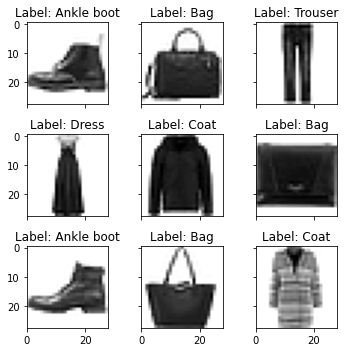

In [6]:
plot_images_sample(X_train, y_train_lab)

### Definición del modelo
[Keras models](https://keras.io/api/models/)
[Layer Conv2d](https://keras.io/api/layers/convolution_layers/convolution2d/)
[Layer Averagepooling2D](https://keras.io/api/layers/pooling_layers/average_pooling2d/)

In [7]:
# Secuential 
model = Sequential()

# Capa de convolución que no reduce dimensiones
model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', 
                        input_shape=(28,28,1), padding='same'))

# Capa de pooling que calcula promedio y reduce dimensiones a la mitad
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))

# Capa de convolución que usa 16 kernels reduce dimensiones de 14x14 a 10x10
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Capa de pooling que calcula promedio y reduce dimensiones a la mitad
model.add(layers.AveragePooling2D())

# Aplanamiento de imagenes a un vector de 400 elementos
model.add(layers.Flatten())

# Reducción de dimensiones del vector
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))

# La capa softmax calcula la probabilidad que un elemento pertenezca a una cierta categoría
model.add(layers.Dense(units=10, activation = 'softmax'))

### Resumen del modelo

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Entrenamiento del modelo

In [9]:
# Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = dt.now()
# Se entrena el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=64)
print(dt.now() - start)

Epoch 1/8
938/938 [==============================] - 41s 43ms/step - loss: 0.6002 - accuracy: 0.7835 - val_loss: 0.4775 - val_accuracy: 0.8261
Epoch 2/8
938/938 [==============================] - 40s 42ms/step - loss: 0.4138 - accuracy: 0.8466 - val_loss: 0.4103 - val_accuracy: 0.8515
Epoch 3/8
938/938 [==============================] - 40s 43ms/step - loss: 0.3628 - accuracy: 0.8663 - val_loss: 0.3955 - val_accuracy: 0.8578
Epoch 4/8
938/938 [==============================] - 40s 43ms/step - loss: 0.3344 - accuracy: 0.8766 - val_loss: 0.3663 - val_accuracy: 0.8654
Epoch 5/8
938/938 [==============================] - 40s 43ms/step - loss: 0.3117 - accuracy: 0.8843 - val_loss: 0.3317 - val_accuracy: 0.8772
Epoch 6/8
938/938 [==============================] - 41s 43ms/step - loss: 0.2957 - accuracy: 0.8896 - val_loss: 0.3242 - val_accuracy: 0.8840
Epoch 7/8
938/938 [==============================] - 40s 43ms/step - loss: 0.2794 - accuracy: 0.8955 - val_loss: 0.3189 - val_accuracy: 0.8851

### Controlando el sobreajuste

<img src="overfit.png" alt="Drawing" style="width: 500px;"/>

[Regularizadores Keras](https://keras.io/api/layers/regularization_layers/)

### Haciendo predicciones con el modelo

In [10]:
pred = model.predict(X_test)
pred_lab = np.array([np.argmax(x) for x in pred])
print(pred[0])
#print(pred_lab[0])

[1.1850104e-06 7.7954570e-07 2.9544739e-07 3.1393917e-08 7.9414417e-07
 3.6430193e-04 7.6909384e-07 2.4327559e-03 1.1745244e-06 9.9719787e-01]


### Visualización de las predicciones

Indices de selección aleatoria: [7335 9760 5793 5105 1207 5109  366 1025 3363]


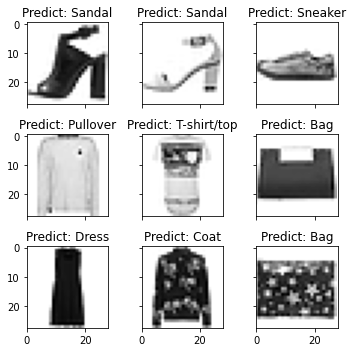

In [11]:
plot_images_sample(X_test, pred_lab, predict=True)

### Guardar modelo


In [12]:
model.save('MNist_fashion_Keras.h5')

### Cargar modelo

In [13]:
model_loaded = load_model('MNist_fashion_Keras.h5')
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Predicciones sobre un modelo cargado

Indices de selección aleatoria: [9773 7314 8845  200 4793 4608 1209 1724 1761]


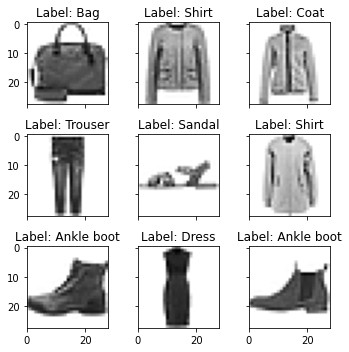

In [14]:
pred = model_loaded.predict(X_test)
pred_lab = np.array([np.argmax(x) for x in pred])
plot_images_sample(X_test, pred_lab)